In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

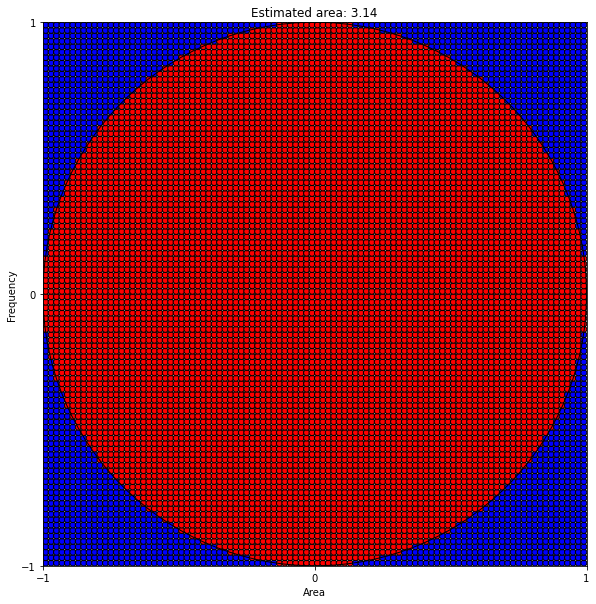

In [13]:
# Sample data
n_samples = 100
d_shift = 2/(n_samples*2)
x_range = np.linspace(-1 + d_shift, 1 - d_shift, n_samples) 
y_range = np.linspace(-1 + d_shift, 1 - d_shift, n_samples)

# Create the grid of x and y values
x_axis, y_axis = np.meshgrid(x_range, y_range)

# Calculate the distance from the origin for each point
distances = np.sqrt(x_axis**2 + y_axis**2)

# Check if the points are inside the circle with radius 1
inside_circle = distances.flatten() <= 1

# Create a color array based on the condition
colors = np.where(inside_circle, 'red', 'blue')
    
# Plot the points    
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_axis, y_axis, edgecolor='k', c=colors)

# Plot the circle
circle = plt.Circle((0, 0), 1, color='k', fill=False)
ax.add_artist(circle)

# Calculate area based on the ratio of points inside the circle
area = np.sum(inside_circle) / len(inside_circle) * 4
area

ax.set(xlim=(-1, 1), ylim=(-1, 1), xticks=[-1, 0, 1], yticks=[-1, 0, 1])
ax.set_aspect('equal')
ax.set(xlabel='Area', ylabel='Frequency', title='Estimated area: %.2f' %area);

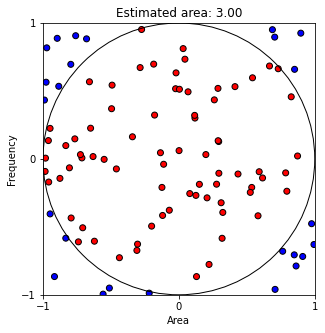

In [16]:
# Sample data
x_axis = np.random.uniform(low=-1, high=1, size=100)
y_axis = np.random.uniform(low=-1, high=1, size=100)

# Calculate the distance from the origin for each point
distances = np.sqrt(x_axis**2 + y_axis**2)

# Check if the points are inside the circle with radius 1
inside_circle = distances <= 1

# Create a color array based on the condition
colors = np.where(inside_circle, 'red', 'blue')
    
# Plot the points    
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x_axis, y_axis, c=colors, edgecolor='k')

# Plot the circle
circle = plt.Circle((0, 0), 1, color='k', fill=False)
ax.add_artist(circle)

# Calculate area based on the ratio of points inside the circle
area = np.sum(inside_circle) / len(inside_circle) * 4
area

# Polish figure
ax.set(xlim=(-1, 1), ylim=(-1, 1), xticks=[-1, 0, 1], yticks=[-1, 0, 1])
ax.set_aspect('equal')
ax.set(xlabel='Area', ylabel='Frequency', title='Estimated area: %.2f' %area);

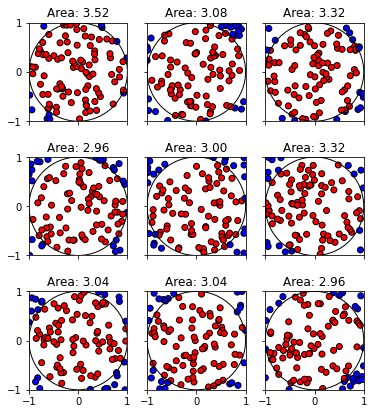

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(6, 7), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat, 1):
    
    # Create 100 uniformly-random xy coordinates between -1 and 1
    x_axis = np.random.uniform(low=-1, high=1, size=100)
    y_axis = np.random.uniform(low=-1, high=1, size=100)
    
    # Assess which points are within the circle area
    distances = np.sqrt(x_axis**2 + y_axis**2)
    inside_circle = distances <= 1
    
    # Assign colors to points in- and outside
    colors = np.where(inside_circle, 'red', 'blue')
    
    # Plot points and cicle
    ax.scatter(x_axis, y_axis, c=colors, edgecolor='k')
    circle = plt.Circle((0, 0), 1, color='k', fill=False)
    ax.add_artist(circle)
    
    # Polish figure
    ax.set(xlim=(-1, 1), ylim=(-1, 1), xticks=[-1, 0, 1], yticks=[-1, 0, 1])
    ax.set_aspect('equal')
    ax.set_title('Area: %.2f' % (np.sum(inside_circle) / len(inside_circle) * 4))

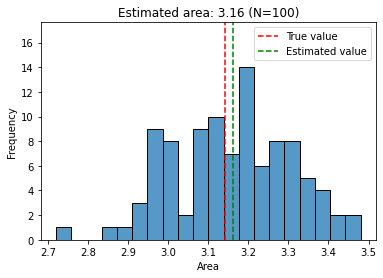

In [ ]:
area_list = []      # This list will hold the area estimation for each iteration

n_iter = 100
for i in range(n_iter):
    
    # Create 100 uniformly-random xy coordinates between -1 and 1
    x_axis = np.random.uniform(low=-1, high=1, size=100)
    y_axis = np.random.uniform(low=-1, high=1, size=100)

    # Assess which points are within the circle area
    distances = np.sqrt(x_axis**2 + y_axis**2)
    inside_circle = distances <= 1

    # Estimate area based on ratio of points inside and the area of a square
    area = np.sum(inside_circle) / len(inside_circle) * 4
    area_list.append(area)
 
    
# Plot histogram with area estimations
ax = sns.histplot(area_list, bins=20)

# Plot true value (piR^2) and average from histogram
ymin, ymax = ax.get_ylim()
ax.plot([np.pi, np.pi], [0, ymax*1.2], color='red', linestyle='--', label='True value')
ax.plot([np.mean(area_list)]*2, [0, ymax*1.2], color='green', linestyle='--', label='Estimated value')

# Polish plot with legend and labels
ax.legend()
ax.set(xlabel='Area', ylabel='Frequency', title='Estimated area: %.2f (N=%d)' %(np.mean(area_list), n_iter), ylim=(0, ymax*1.2));

What do you expect to happen with a reduced number of iterations of the Monte Carlo sampling? Try changing the value of `n_iter`.